In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
import scipy.stats as ss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, log_loss, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize
import math

In [ ]:
df = pd.read_csv("insurance.csv")
df.head()

In [ ]:
df.describe()
df.dropna()

In [ ]:
smoker_df = df[df['smoker'] == 'yes']
non_smoker = df[df['smoker'] == 'no']
smoker_df.info()

In [ ]:
non_smoker.info()

In [ ]:
smoker_df.head()

In [ ]:
m_bmi = smoker_df[smoker_df['sex']=='male']
f_bmi = smoker_df[smoker_df['sex']=='female']

In [ ]:
def bigGraph(df_in, columnName, rnd=0):
    data = pd.Series(df_in[columnName])
    hist = thinkstats2.Hist(round(data, rnd))
    pmf = thinkstats2.Pmf(data)
    cdf = thinkstats2.Cdf(data)
    thinkplot.PrePlot(6, rows =2, cols=3)
    thinkplot.Hist(hist)
    thinkplot.SubPlot(2)
    thinkplot.Pmf(pmf)
    thinkplot.SubPlot(3)
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(4)
    thinkstats2.NormalProbabilityPlot(data)
    thinkplot.SubPlot(5)
    thinkstats2.NormalProbabilityPlot(np.log(data))
    thinkplot.SubPlot(6)
    pdf = thinkstats2.EstimatedPdf(data)
    thinkplot.Pdf(pdf)
    thinkplot.Config()
    return

In [ ]:
#sns.kdeplot(m_bmi)
#sns.kdeplot(f_bmi)


In [ ]:
sns.pairplot(df, hue = 'smoker')

In [ ]:
sns.boxplot(x="region", y="charges", data=df)

In [ ]:
sns.countplot(x="region", data=df)

In [ ]:
corr = df.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

#sns.boxplot(x="region_northwest", y="charges", data=temp,ax=ax[0,1])
#sns.boxplot(x="region_southeast", y="charges", data=temp,ax=ax[1,0])
#sns.boxplot(x="region_southwest", y="charges", data=temp,ax=ax[1,1])

In [19]:
temp = pd.get_dummies(df)
temp.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
corr = temp.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)



In [ ]:
dfX = temp["smoker_no"]
dfY = temp["charges"]
y = np.array(dfY).reshape(-1,1)
x = np.array(dfX)
x.shape, y.shape

In [ ]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=.3)
print("X-Train:", xTrain.shape)
print("X-Test:", xTest.shape)
print("Y-Train:", yTrain.shape)
print("Y-Test:", yTest.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
#model = LinearRegression()
#model.fit(xTrain,yTrain)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
ypred = model.predict(xTest)
mean_squared_error(ypred,yTest,squared=False),model.score(xTest,yTest)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [29]:
df2=df.drop(columns={'age','sex','bmi','children','region'},inplace=True)
df2 = pd.get_dummies(df, drop_first=True)

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   charges     1338 non-null   float64
 1   smoker_yes  1338 non-null   uint8  
dtypes: float64(1), uint8(1)
memory usage: 11.9 KB


<AxesSubplot:xlabel='charges', ylabel='smoker'>

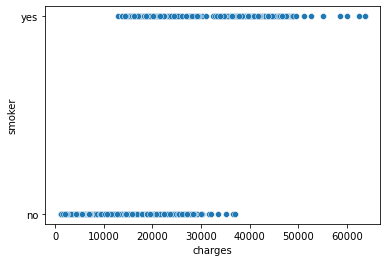

In [23]:
sns.scatterplot(data=df, x='charges',y='smoker')

In [33]:
y=np.array(df2['smoker_yes']).reshape(-1,1)
x=np.array(df2['charges']).reshape(-1,1)
x.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [38]:
scaler = MinMaxScaler()
x2 = scaler.fit_transform(X_train)
X_trans = scaler.transform(X_test)

In [40]:
md1 = LogisticRegression().fit(x2,y_train.ravel())
md1Pred = md1.predict(X_trans)

score = md1.score(X_trans, y_test)
print(score)

0.8980099502487562


In [41]:
def convert_prob_to_label(prob, cutoff = 0.5):
    label = []
    for i in range(len(prob)):
        if prob[i] > cutoff:
            label.append(1)
        else:
            label.append(0)
    return label

F1: 0.6720000000000002
Acc: 0.8980099502487562


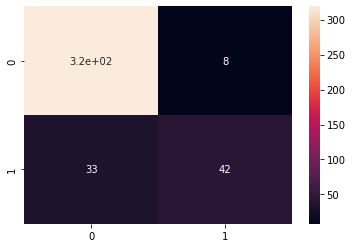

In [42]:
labels = convert_prob_to_label(np.array(md1Pred))
conf_matrix2 = confusion_matrix(y_test,labels)
sns.heatmap(conf_matrix2, annot=True)

print("F1:",f1_score(y_test, labels))
print("Acc:",accuracy_score(y_test, labels))

In [43]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

Resampled dataset shape Counter({0: 711, 1: 157})
F1: 0.7560975609756098
Acc: 0.9095022624434389
Recall: 0.6966292134831461
Precision: 0.8266666666666667


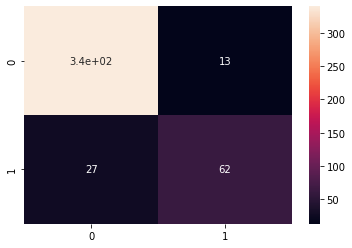

In [44]:
sampler = TomekLinks(sampling_strategy='not majority', n_jobs=-1)
#sampler = SMOTE(n_jobs=-1)
#sampler = ADASYN(n_jobs=-1)
#sampler = SVMSMOTE(n_jobs=-1)

#Build Log Reg model
#Split Data x/y
y4 = np.array(df2['smoker_yes']).reshape(-1,1)
x4 = np.array(df2.drop(columns={"smoker_yes"}))

X_train4, X_test4, y_train4, y_test4 = train_test_split(x4, y4, test_size=0.33)

#Look at relative imbalance after split
X_train4Samp, y_train4Samp = sampler.fit_resample(X_train4, y_train4)
print('Resampled dataset shape %s' % Counter(y_train4Samp))

#Normalize data
#scaler = MinMaxScaler()
#scler is used when the ranges of the variable are very different 
scaler = StandardScaler()
X_train4_norm = scaler.fit_transform(X_train4Samp)
X_test4_norm = scaler.transform(X_test4)

#Train model
model4 = LogisticRegression(max_iter=1000, n_jobs=-1).fit(X_train4_norm,y_train4Samp.ravel())

#Make predictions
preds4 = model4.predict(X_test4_norm)

#Generate 1/0 results and show results
labels4 = binarize(np.array(preds4).reshape(-1,1), threshold=.5)
conf_matrix4 = confusion_matrix(y_test4,labels4)
sns.heatmap(conf_matrix4, annot=True)

print("F1:",f1_score(y_test4, labels4))
print("Acc:",accuracy_score(y_test4, labels4))
print("Recall:",recall_score(y_test4, labels4))
print("Precision:",precision_score(y_test4, labels4))